In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import argopy
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()
import cmocean

In [4]:
float_sel = [6901199, 3901602, 5905033, 5904640, 1902024, 5905051]
levels = list(range(0, 1000))

afloat = argo_loader.float(float_sel[1]).to_xarray()
afloat_prof = afloat.argo.point2profile()
afloat_interp = afloat_prof.argo.interp_std_levels(levels)

Text(0.5, 1.0, 'Salinity Vertical Anomaly, Float #3901602')

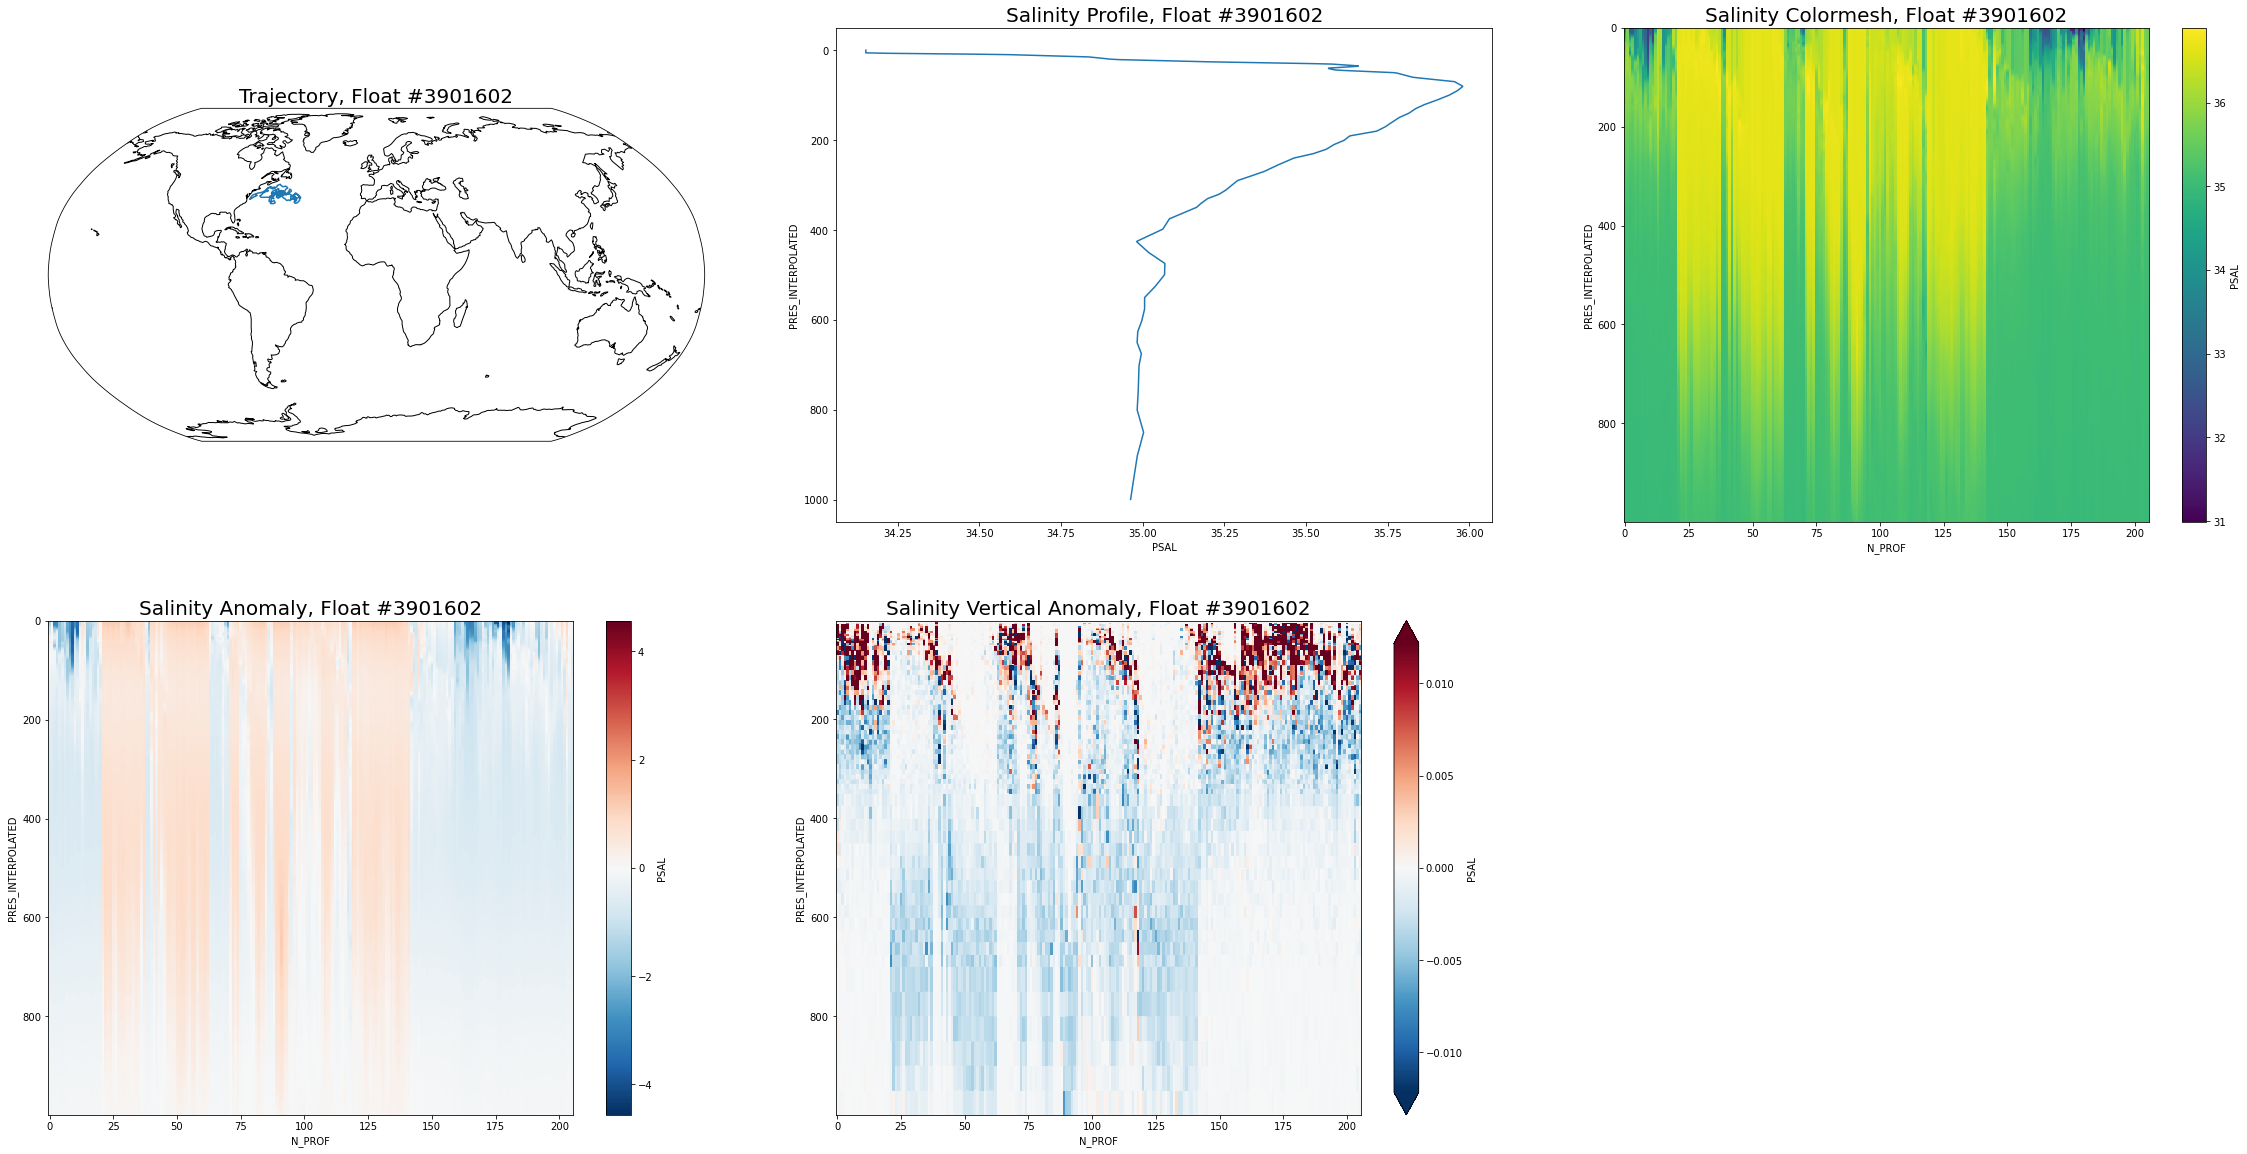

In [7]:
#Examples from 10 June 2022 meeting with Julius
#Use these to define function

salinity = afloat_interp.PSAL
salinity_anom = salinity - salinity.mean('N_PROF')

#Map of float path
fig = plt.figure(figsize=(40,20))
ax = fig.add_subplot(2, 3, 1, projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.plot(afloat_interp.LONGITUDE, afloat_interp.LATITUDE, transform=ccrs.PlateCarree())
plt.title("Trajectory, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])), fontsize=20)

#Salinity profile
plt.subplot(2,3,2)
afloat_interp.isel(N_PROF=0).PSAL.plot(y='PRES_INTERPOLATED', yincrease=False)
plt.title("Salinity Profile, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])), fontsize=20)

#Salinity colormesh
plt.subplot(2,3,3)
salinity.plot(x='N_PROF', yincrease=False)
plt.title("Salinity Colormesh, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])), fontsize=20)

#Salinity anomaly
plt.subplot(2,3,4)
salinity_anom.plot(x='N_PROF', yincrease=False)
plt.title("Salinity Anomaly, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])), fontsize=20)

#Salinity vertical anomaly
plt.subplot(2,3,5)
salinity_vert = salinity.diff('PRES_INTERPOLATED')
salinity_vert.plot(x='N_PROF', yincrease=False, robust=True)
plt.title("Salinity Vertical Anomaly, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])), fontsize=20)